# 정규화(원핫 인코딩 + 표준화)
## plant 데이터 prepocessing

In [82]:
import pandas as pd
import missingno
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.options.display.max_columns = 999

In [83]:
plant = pd.read_csv("data/31.finaldata_plant/plant.csv")
plant

,MEA_DDHR,PLANT,LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC,DEW_POINT_IN
0,2016-04-01 00:00:00,1,1,16.00,24.00,11.00,9.00,42.00,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,-4.561169
1,2016-04-01 03:00:00,1,1,14.00,28.00,10.00,7.00,59.00,2016-04-02 03:00:00,0.0,2016-04-03 03:00:00,0.0,-4.222123
2,2016-04-01 06:00:00,1,1,13.00,33.00,10.00,6.00,56.00,2016-04-02 06:00:00,0.0,2016-04-03 06:00:00,0.0,-2.896847
3,2016-04-01 09:00:00,1,1,13.00,33.00,10.00,18.00,30.00,2016-04-02 09:00:00,0.0,2016-04-03 09:00:00,0.0,-2.896847
4,2016-04-01 12:00:00,1,1,16.00,28.00,10.00,18.00,20.00,2016-04-02 12:00:00,0.0,2016-04-03 12:00:00,0.0,-2.502215
...,...,...,...,...,...,...,...,...,...,...,...,...,...
349312,2019-03-31 23:00:00,2,3,8.29,37.82,9.53,4.72,50.98,2019-04-01 23:00:00,0.0,2019-04-02 23:00:00,0.0,-5.252838
349313,2019-03-31 23:10:00,2,3,8.26,38.34,9.57,4.72,52.11,2019-04-01 23:10:00,0.0,2019-04-02 23:10:00,0.0,-5.099800
349314,2019-03-31 23:20:00,2,3,8.29,38.92,9.60,4.66,51.01,2019-04-01 23:20:00,0.0,2019-04-02 23:20:00,0.0,-4.874884
349315,2019-03-31 23:30:00,2,3,8.32,39.13,9.49,4.57,51.47,2019-04-01 23:30:00,0.0,2019-04-02 23:30:00,0.0,-4.776917


## test_data validation &정규화 preprosessing

In [84]:
test_data = pd.read_csv("data/31.finaldata_plant/test_data.csv")
test_data

,MEA_DDHR,PLANT,LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC,DEW_POINT_IN
0,2019-04-01 00:00:00,2,3,8.17,40.42,10.10,4.20,54.82,2019-04-02 00:00:00,NaN,2019-04-03 00:00:00,NaN,-4.482439
1,2019-04-01 04:30:00,1,2,10.03,48.81,10.79,6.09,59.34,2019-04-02 04:30:00,NaN,2019-04-03 04:30:00,NaN,-0.247107
2,2019-04-01 10:30:00,2,3,9.45,40.93,9.07,12.26,32.14,2019-04-02 10:30:00,NaN,2019-04-03 10:30:00,NaN,-3.163210
3,2019-04-01 11:00:00,1,1,12.32,34.13,10.86,12.32,28.27,2019-04-02 11:00:00,NaN,2019-04-03 11:00:00,NaN,-3.042714
4,2019-04-01 13:30:00,2,1,11.28,22.65,8.76,12.01,19.84,2019-04-02 13:30:00,NaN,2019-04-03 13:30:00,NaN,-9.291221
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,2020-03-29 03:00:00,1,2,10.73,33.36,13.30,6.28,46.37,2020-03-30 03:00:00,NaN,2020-03-31 03:00:00,NaN,-4.745901
3535,2020-03-29 05:00:00,2,3,9.15,38.86,11.70,1.39,74.33,2020-03-30 05:00:00,NaN,2020-03-31 05:00:00,NaN,-4.125121
3536,2020-03-29 07:00:00,2,1,7.10,44.87,9.03,4.26,58.06,2020-03-30 07:00:00,NaN,2020-03-31 07:00:00,NaN,-4.064845
3537,2020-03-29 11:30:00,1,1,13.54,33.49,12.20,12.90,33.67,2020-03-30 11:30:00,NaN,2020-03-31 11:30:00,NaN,-2.224313


In [85]:
from sklearn.preprocessing import StandardScaler
def preprosess(data):
    # 파생변수를 스케줄링 해줌(표준화)
    caling_category = ['TEM_IN', 'HUM_IN', "TEM_COIL", "TEM_OUT_LOC1", "HUM_OUT_LOC1", "DEW_POINT_IN"]
    scaling_features = data[caling_category]
    scaler = StandardScaler()
    scaled_nd = scaler.fit_transform(scaling_features)
    scaled_df = pd.DataFrame(scaled_nd, columns=scaling_features.columns)
    data.drop(caling_category, axis=1, inplace=True)
    data = pd.concat([data,scaled_df], axis=1)
    # 원-핫 인코딩
#     category = ["PLANT", "LOC", "MONTH", "WEEK","HOUR"]
    dummy_category = ["PLANT", "LOC"]
    data = pd.get_dummies(data , columns=dummy_category)

    return data

In [86]:
plant = preprosess(plant)
plant.head()

,MEA_DDHR,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,DEW_POINT_IN,PLANT_1,PLANT_2,LOC_1,LOC_2,LOC_3
0,2016-04-01 00:00:00,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,-0.036700,-2.057425,-0.486644,-0.416944,-1.060988,-0.948895,1,0,1,0,0
1,2016-04-01 03:00:00,2016-04-02 03:00:00,0.0,2016-04-03 03:00:00,0.0,-0.237239,-1.768877,-0.585582,-0.597441,-0.155766,-0.919136,1,0,1,0,0
2,2016-04-01 06:00:00,2016-04-02 06:00:00,0.0,2016-04-03 06:00:00,0.0,-0.337508,-1.408192,-0.585582,-0.687689,-0.315511,-0.802814,1,0,1,0,0
3,2016-04-01 09:00:00,2016-04-02 09:00:00,0.0,2016-04-03 09:00:00,0.0,-0.337508,-1.408192,-0.585582,0.395291,-1.699968,-0.802814,1,0,1,0,0
4,2016-04-01 12:00:00,2016-04-02 12:00:00,0.0,2016-04-03 12:00:00,0.0,-0.036700,-1.768877,-0.585582,0.395291,-2.232452,-0.768177,1,0,1,0,0


In [87]:
plant.to_csv('data/21.savedata_plant/pre_palnt.csv',index=False)

In [88]:
test = preprosess(test_data)
test.head()

,MEA_DDHR,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,DEW_POINT_IN,PLANT_1,PLANT_2,LOC_1,LOC_2,LOC_3
0,2019-04-01 00:00:00,2019-04-02 00:00:00,NaN,2019-04-03 00:00:00,NaN,-0.936761,-1.054636,-0.641253,-1.016510,-0.547359,-1.156985,0,1,0,0,1
1,2019-04-01 04:30:00,2019-04-02 04:30:00,NaN,2019-04-03 04:30:00,NaN,-0.720865,-0.449353,-0.562858,-0.817131,-0.319514,-0.722579,1,0,0,1,0
2,2019-04-01 10:30:00,2019-04-02 10:30:00,NaN,2019-04-03 10:30:00,NaN,-0.788188,-1.017843,-0.758277,-0.166248,-1.690616,-1.021676,0,1,0,0,1
3,2019-04-01 11:00:00,2019-04-02 11:00:00,NaN,2019-04-03 11:00:00,NaN,-0.455058,-1.508418,-0.554905,-0.159918,-1.885695,-1.009317,1,0,1,0,0
4,2019-04-01 13:30:00,2019-04-02 13:30:00,NaN,2019-04-03 13:30:00,NaN,-0.575774,-2.336624,-0.793497,-0.192621,-2.310636,-1.650210,0,1,1,0,0


In [89]:
test.to_csv('data/21.savedata_plant/pre_test.csv',index=False)

# 데이터 분류
## plant_train 데이터
### train, test 데이터 분리

In [90]:
timeList = ['MEA_DDHR', 'X24H_TMA', 'X48H_TMA']
plant = plant.drop(timeList, axis=1)


In [91]:
plant.head()

,X24H_COND_LOC,X48H_COND_LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,DEW_POINT_IN,PLANT_1,PLANT_2,LOC_1,LOC_2,LOC_3
0,0.0,0.0,-0.036700,-2.057425,-0.486644,-0.416944,-1.060988,-0.948895,1,0,1,0,0
1,0.0,0.0,-0.237239,-1.768877,-0.585582,-0.597441,-0.155766,-0.919136,1,0,1,0,0
2,0.0,0.0,-0.337508,-1.408192,-0.585582,-0.687689,-0.315511,-0.802814,1,0,1,0,0
3,0.0,0.0,-0.337508,-1.408192,-0.585582,0.395291,-1.699968,-0.802814,1,0,1,0,0
4,0.0,0.0,-0.036700,-1.768877,-0.585582,0.395291,-2.232452,-0.768177,1,0,1,0,0


In [92]:
train_X = plant.drop(['X24H_COND_LOC', 'X48H_COND_LOC'], axis=1)
train24_y = plant[['X24H_COND_LOC']]
train48_y = plant[['X48H_COND_LOC']]

### 24시간 후 결로 예상 분류

In [93]:
from sklearn.model_selection import train_test_split
X_train24, X_val24, y_train24, y_val24 = train_test_split(train_X, train24_y, test_size=0.3, shuffle=True, random_state=42)

### 48시간 후 결로 예상 분류

In [94]:
from sklearn.model_selection import train_test_split
X_train48, X_val48, y_train48, y_val48 = train_test_split(train_X, train48_y, test_size=0.3, shuffle=True, random_state=42)

## test_data 만들기

In [95]:
timeList = ['MEA_DDHR', 'X24H_TMA', 'X48H_TMA']
test = test.drop(timeList, axis=1)
test_X = test.drop(['X24H_COND_LOC', 'X48H_COND_LOC'], axis=1)
test24_y = test[['X24H_COND_LOC']]
test48_y = test[['X48H_COND_LOC']]

## Valiation  함수 만들기

In [96]:
def makeValiation(model24,model48):
    """ 검증 데이터를 만들기 위한 함수입니다. 24후 모델,48후 모델값을 넣어 주어야 합니다."""
    validation = test_data[["MEA_DDHR","PLANT", "LOC", "X24H_TMA", "X48H_TMA"]]
    # 24시간 후 예측하기, 확률로 나누기
    predict24 = model24.predict(test_X)
    predict24_proba = model24.predict_proba(test_X)
    # 48시간 후 예측하기, 확률로 나누기
    predict48 = model48.predict(test_X)
    predict48_proba  = model48.predict_proba(test_X)
    # X24H_COND_LOC, X24H_COND_LOC_PROB, X48H_COND_LOC, X48H_COND_LOC_PROB
    validation["X24H_COND_LOC"] = predict24.astype(int)
    validation["X24H_COND_LOC_PROB"] = (predict24_proba[:,1]*100).astype(int)
    validation["X48H_COND_LOC"] = (predict48).astype(int)
    validation["X48H_COND_LOC_PROB"] = (predict48_proba[:,1]*100).astype(int)
    # 검증 형식 맞춰주기
    validation = validation[["MEA_DDHR","PLANT", "LOC", "X24H_TMA","X24H_COND_LOC", "X24H_COND_LOC_PROB", "X48H_TMA", "X48H_COND_LOC", "X48H_COND_LOC_PROB"]]
    return validation

## 모델 저장 함수 만들기

In [97]:
import os
from datetime import datetime as dt
def save_validation_csv(data, model_name):
    """모델 별로 저장해주는 함수 data 값과 저장 모델 명을 넣으면 된다 모델명은 문자열로 넣어 주어야 한다"""
    save_path = "data/41.validation/"+model_name+"/"+str(dt.today().strftime("%Y%m%d%H%M%S"))
    if not os.path.isdir(save_path):
        os.mkdir(save_path)
    data.to_csv(save_path+"/203545.csv",index=False)

# Random Forest
## 24 시간 결로 예측

In [98]:
from sklearn.ensemble import RandomForestClassifier
rf_model24 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model24.fit(X_train24, y_train24)

C:\Users\silen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [99]:
y_pred24 = rf_model24.predict(X_val24)
from sklearn.metrics import classification_report
print(classification_report(y_val24, y_pred24))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    104207
         1.0       0.97      0.51      0.67       589

    accuracy                           1.00    104796
   macro avg       0.98      0.75      0.83    104796
weighted avg       1.00      1.00      1.00    104796



In [100]:
imp_rf24_df = pd.DataFrame(data=np.c_[train_X.columns.values, rf_model24.feature_importances_], columns=['variable', 'importance'])
imp_rf24_df.sort_values(by='importance', ascending=False, inplace=True)

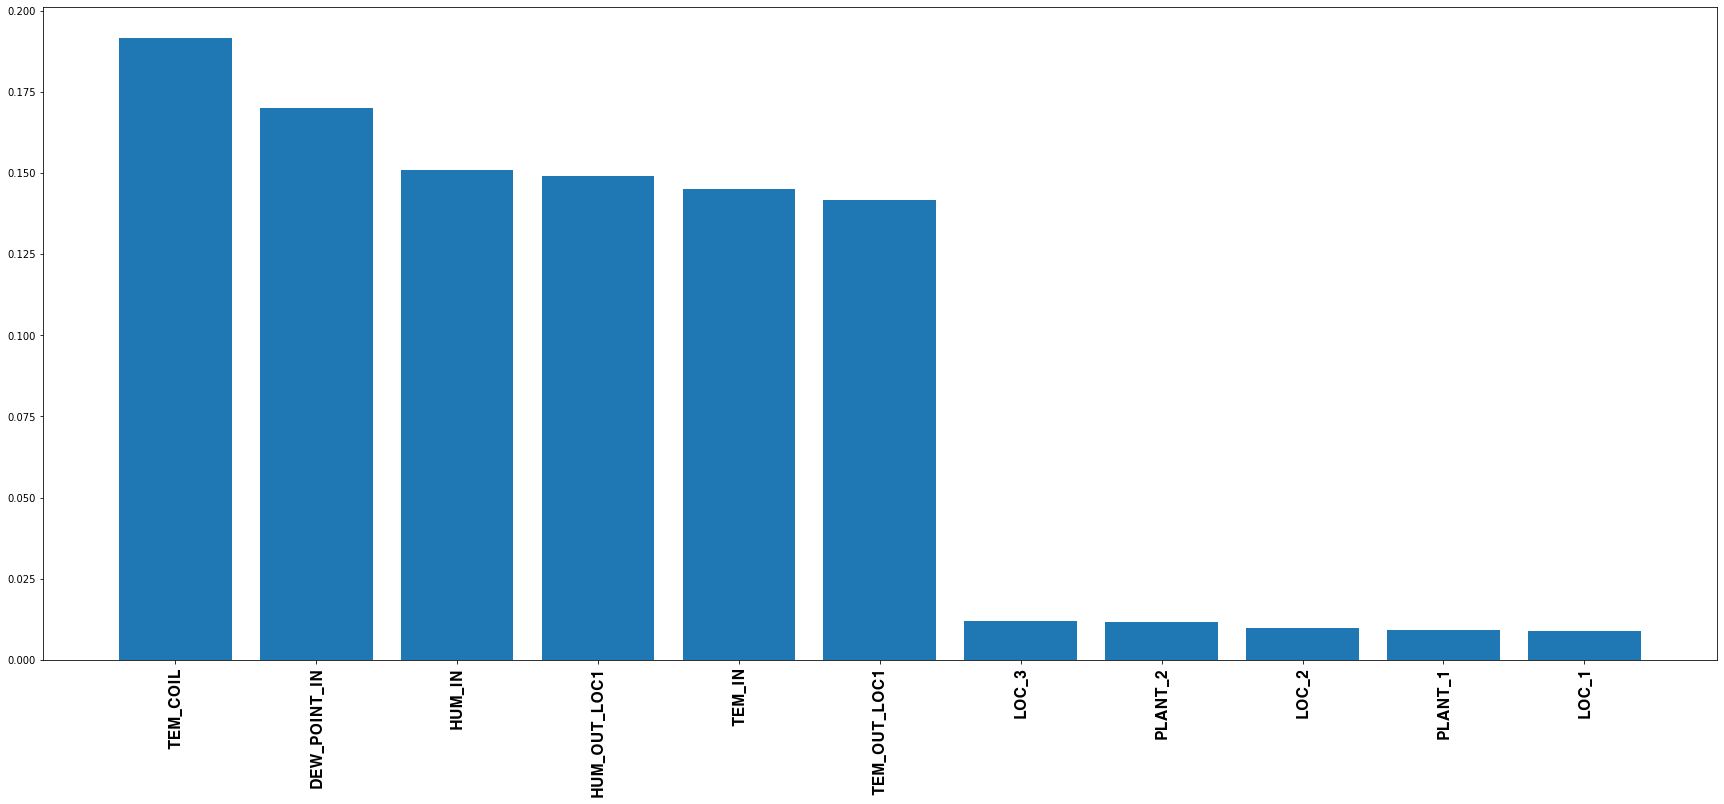

In [101]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager as fm
font_path = "C:/Windows/Fonts/H2GTRE.TTF"
font_prop = fm.FontProperties(fname=font_path, size=15)

plt.figure(figsize=(30,12))
plt.bar(imp_rf24_df.variable, imp_rf24_df.importance)
plt.xticks(rotation=90, fontproperties=font_prop)
plt.show()

## 48시간 결로 예측

In [102]:
from sklearn.ensemble import RandomForestClassifier
rf_model48 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model48.fit(X_train48, y_train48)

C:\Users\silen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [103]:
y_pred48 = rf_model48.predict(X_val48)
from sklearn.metrics import classification_report
print(classification_report(y_val48, y_pred48))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    104192
         1.0       0.94      0.29      0.44       604

    accuracy                           1.00    104796
   macro avg       0.97      0.64      0.72    104796
weighted avg       1.00      1.00      0.99    104796



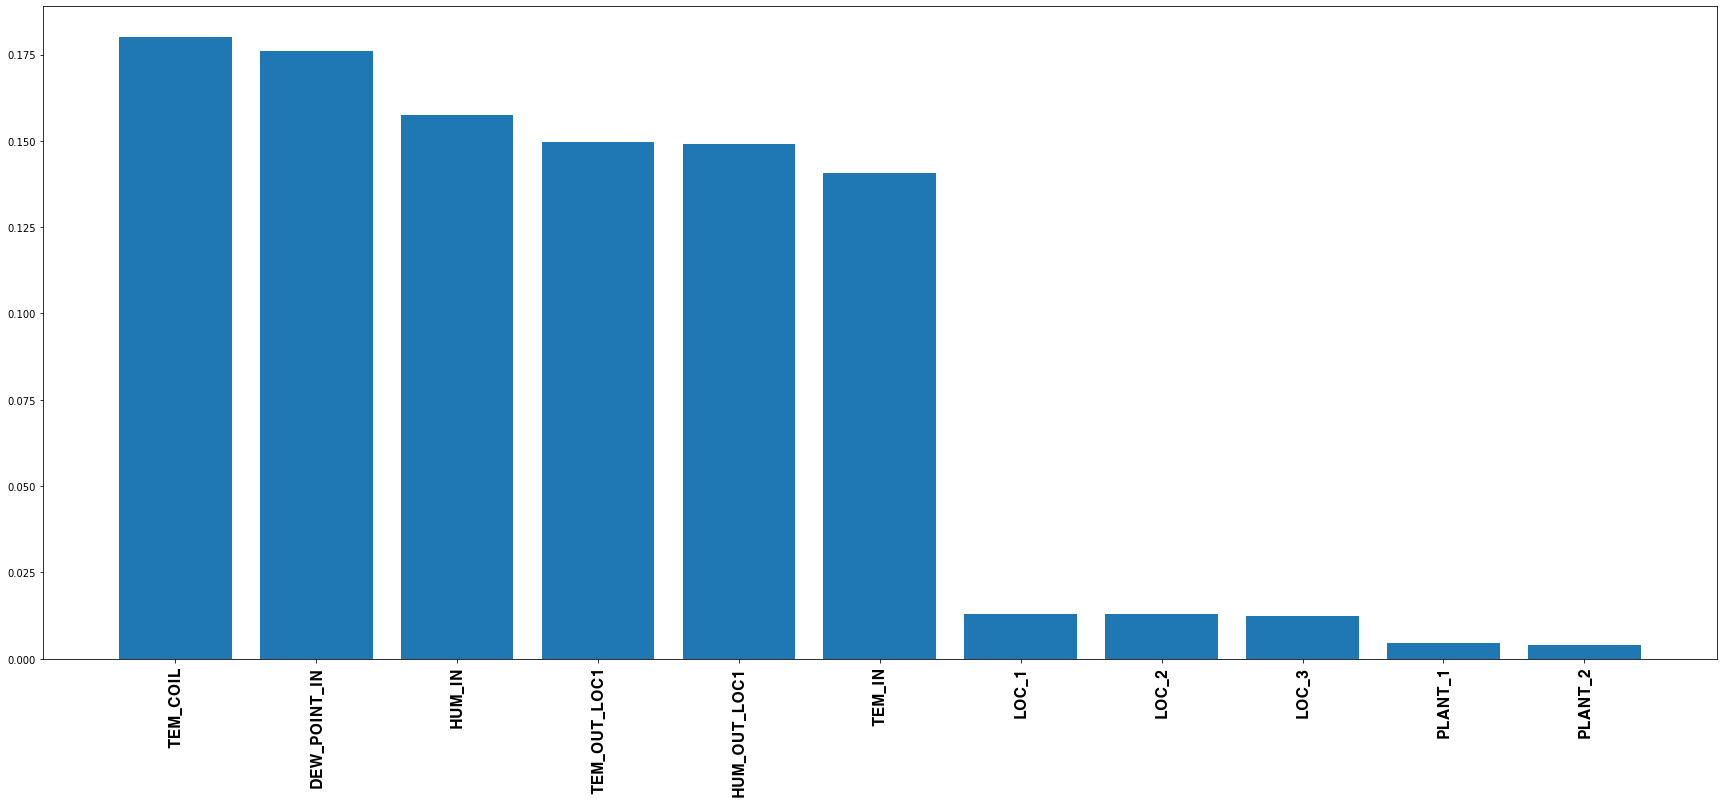

In [104]:
imp_rf48_df = pd.DataFrame(data=np.c_[train_X.columns.values, rf_model48.feature_importances_], columns=['variable', 'importance'])
imp_rf48_df.sort_values(by='importance', ascending=False, inplace=True)
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager as fm
font_path = "C:/Windows/Fonts/H2GTRE.TTF"
font_prop = fm.FontProperties(fname=font_path, size=15)

plt.figure(figsize=(30,12))
plt.bar(imp_rf48_df.variable, imp_rf48_df.importance)
plt.xticks(rotation=90, fontproperties=font_prop)
plt.show()

## 검증값 만들기

In [105]:
validation = makeValiation(rf_model24, rf_model48)
validation

C:\Users\silen\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
0,2019-04-01 00:00:00,2,3,2019-04-02 00:00:00,0,0,2019-04-03 00:00:00,0,0
1,2019-04-01 04:30:00,1,2,2019-04-02 04:30:00,0,0,2019-04-03 04:30:00,0,0
2,2019-04-01 10:30:00,2,3,2019-04-02 10:30:00,0,2,2019-04-03 10:30:00,0,0
3,2019-04-01 11:00:00,1,1,2019-04-02 11:00:00,0,0,2019-04-03 11:00:00,0,0
4,2019-04-01 13:30:00,2,1,2019-04-02 13:30:00,0,2,2019-04-03 13:30:00,0,0
...,...,...,...,...,...,...,...,...,...
3534,2020-03-29 03:00:00,1,2,2020-03-30 03:00:00,0,0,2020-03-31 03:00:00,0,0
3535,2020-03-29 05:00:00,2,3,2020-03-30 05:00:00,0,0,2020-03-31 05:00:00,0,0
3536,2020-03-29 07:00:00,2,1,2020-03-30 07:00:00,0,3,2020-03-31 07:00:00,0,1
3537,2020-03-29 11:30:00,1,1,2020-03-30 11:30:00,0,0,2020-03-31 11:30:00,0,0


In [106]:
def findCondRow24(validation):
    data = validation.loc[validation["X24H_COND_LOC"] == 1]
    return data
def findCondRow48(validation):
    data = validation.loc[validation["X48H_COND_LOC"] == 1]
    return data    

In [107]:
findCondRow24(validation)

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
2233,2019-12-09 14:00:00,1,2,2019-12-10 14:00:00,1,51,2019-12-11 14:00:00,0,0
2261,2019-12-10 16:00:00,1,2,2019-12-11 16:00:00,1,63,2019-12-12 16:00:00,0,1
3014,2020-02-11 15:00:00,2,1,2020-02-12 15:00:00,1,52,2020-02-13 15:00:00,0,5
3016,2020-02-11 15:00:00,2,2,2020-02-12 15:00:00,1,53,2020-02-13 15:00:00,0,3


In [108]:
findCondRow48(validation)

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
2362,2019-12-16 11:30:00,1,1,2019-12-17 11:30:00,0,0,2019-12-18 11:30:00,1,55


## 파일 저장하기

In [109]:
save_validation_csv(validation,"rforest")

# LightGBM
## 24시간 결로 예측

In [110]:
from lightgbm import LGBMClassifier
lgbm_model24 = LGBMClassifier(n_estimators=100, random_state=42)
lgbm_model24.fit(X_train24, y_train24)

C:\Users\silen\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\silen\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [111]:
y_pred24 = lgbm_model24.predict(X_val24)
from sklearn.metrics import classification_report
print(classification_report(y_val24, y_pred24))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    104207
         1.0       0.59      0.48      0.53       589

    accuracy                           1.00    104796
   macro avg       0.80      0.74      0.77    104796
weighted avg       0.99      1.00      1.00    104796



## 48시간 결로 예측

In [112]:
from lightgbm import LGBMClassifier
lgbm_model48 = LGBMClassifier(n_estimators=100, random_state=42)
lgbm_model48.fit(X_train48, y_train48)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [113]:
y_pred48 = lgbm_model48.predict(X_val48)
from sklearn.metrics import classification_report
print(classification_report(y_val48, y_pred48))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    104192
         1.0       0.38      0.24      0.30       604

    accuracy                           0.99    104796
   macro avg       0.69      0.62      0.65    104796
weighted avg       0.99      0.99      0.99    104796



## 검증값 만들기

In [114]:
lgValiation =makeValiation(lgbm_model24,lgbm_model48)
lgValiation

C:\Users\silen\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
0,2019-04-01 00:00:00,2,3,2019-04-02 00:00:00,0,0,2019-04-03 00:00:00,0,0
1,2019-04-01 04:30:00,1,2,2019-04-02 04:30:00,0,0,2019-04-03 04:30:00,0,0
2,2019-04-01 10:30:00,2,3,2019-04-02 10:30:00,0,5,2019-04-03 10:30:00,0,0
3,2019-04-01 11:00:00,1,1,2019-04-02 11:00:00,0,0,2019-04-03 11:00:00,0,0
4,2019-04-01 13:30:00,2,1,2019-04-02 13:30:00,0,0,2019-04-03 13:30:00,0,0
...,...,...,...,...,...,...,...,...,...
3534,2020-03-29 03:00:00,1,2,2020-03-30 03:00:00,0,0,2020-03-31 03:00:00,0,0
3535,2020-03-29 05:00:00,2,3,2020-03-30 05:00:00,0,0,2020-03-31 05:00:00,0,0
3536,2020-03-29 07:00:00,2,1,2020-03-30 07:00:00,0,14,2020-03-31 07:00:00,0,0
3537,2020-03-29 11:30:00,1,1,2020-03-30 11:30:00,0,0,2020-03-31 11:30:00,0,0


In [115]:
findCondRow24(lgValiation)

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
188,2019-04-21 01:30:00,1,2,2019-04-22 01:30:00,1,100,2019-04-23 01:30:00,0,0
411,2019-05-14 09:30:00,1,3,2019-05-15 09:30:00,1,90,2019-05-16 09:30:00,0,5
421,2019-05-15 12:30:00,2,1,2019-05-16 12:30:00,1,69,2019-05-17 12:30:00,0,0
627,2019-06-07 13:30:00,1,1,2019-06-08 13:30:00,1,100,2019-06-09 13:30:00,0,0
738,2019-06-19 23:30:00,1,3,2019-06-20 23:30:00,1,100,2019-06-21 23:30:00,0,0
739,2019-06-20 06:30:00,1,3,2019-06-21 06:30:00,1,99,2019-06-22 06:30:00,0,0
1374,2019-09-01 00:30:00,1,3,2019-09-02 00:30:00,1,100,2019-09-03 00:30:00,0,0
1379,2019-09-01 07:00:00,1,3,2019-09-02 07:00:00,1,100,2019-09-03 07:00:00,0,0
2044,2019-11-21 07:30:00,1,3,2019-11-22 07:30:00,1,69,2019-11-23 07:30:00,0,0
2078,2019-11-23 14:30:00,1,2,2019-11-24 14:30:00,1,95,2019-11-25 14:30:00,0,0


In [116]:
findCondRow48(lgValiation)

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
64,2019-04-07 03:00:00,2,1,2019-04-08 03:00:00,0,0,2019-04-09 03:00:00,1,99
419,2019-05-15 10:00:00,2,1,2019-05-16 10:00:00,0,0,2019-05-17 10:00:00,1,100
604,2019-06-05 02:00:00,1,2,2019-06-06 02:00:00,0,0,2019-06-07 02:00:00,1,100
923,2019-07-12 08:00:00,1,3,2019-07-13 08:00:00,0,0,2019-07-14 08:00:00,1,100
1540,2019-09-22 12:30:00,2,2,2019-09-23 12:30:00,0,0,2019-09-24 12:30:00,1,99
1585,2019-09-26 03:00:00,1,3,2019-09-27 03:00:00,0,0,2019-09-28 03:00:00,1,100
2184,2019-12-08 08:00:00,1,2,2019-12-09 08:00:00,0,0,2019-12-10 08:00:00,1,84
2348,2019-12-16 10:00:00,1,1,2019-12-17 10:00:00,0,0,2019-12-18 10:00:00,1,98
2353,2019-12-16 10:30:00,1,1,2019-12-17 10:30:00,0,0,2019-12-18 10:30:00,1,51
2362,2019-12-16 11:30:00,1,1,2019-12-17 11:30:00,0,0,2019-12-18 11:30:00,1,57


## 파일 저장하기

In [117]:
save_validation_csv(lgValiation,"lgbm")

# XGBOOST
## 24시간 결로 예측

In [118]:
from xgboost import XGBClassifier
xgb_model24 = XGBClassifier(max_depth=10, learning_rate=0.01, n_estimators=100, random_state=42)
xgb_model24.fit(X_train24, y_train24)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.01, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [119]:
y_pred24 = xgb_model24.predict(X_val24)
from sklearn.metrics import classification_report
print(classification_report(y_val24, y_pred24))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    104207
         1.0       0.91      0.39      0.54       589

    accuracy                           1.00    104796
   macro avg       0.95      0.69      0.77    104796
weighted avg       1.00      1.00      1.00    104796



## 48시간 결로 예측

In [120]:
from xgboost import XGBClassifier
xgb_model48 = XGBClassifier(max_depth=10, learning_rate=0.01, n_estimators=100, random_state=42)
xgb_model48.fit(X_train48, y_train48)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.01, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [121]:
y_pred48 = xgb_model48.predict(X_val48)
from sklearn.metrics import classification_report
print(classification_report(y_val48, y_pred48))

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00    104192
         1.0       0.94      0.05      0.10       604

    accuracy                           0.99    104796
   macro avg       0.97      0.53      0.55    104796
weighted avg       0.99      0.99      0.99    104796



## 검증 값 만들기

In [122]:
xgValiation=makeValiation(xgb_model24,xgb_model48)
xgValiation

C:\Users\silen\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
0,2019-04-01 00:00:00,2,3,2019-04-02 00:00:00,0,18,2019-04-03 00:00:00,0,18
1,2019-04-01 04:30:00,1,2,2019-04-02 04:30:00,0,18,2019-04-03 04:30:00,0,18
2,2019-04-01 10:30:00,2,3,2019-04-02 10:30:00,0,18,2019-04-03 10:30:00,0,18
3,2019-04-01 11:00:00,1,1,2019-04-02 11:00:00,0,18,2019-04-03 11:00:00,0,18
4,2019-04-01 13:30:00,2,1,2019-04-02 13:30:00,0,18,2019-04-03 13:30:00,0,18
...,...,...,...,...,...,...,...,...,...
3534,2020-03-29 03:00:00,1,2,2020-03-30 03:00:00,0,18,2020-03-31 03:00:00,0,18
3535,2020-03-29 05:00:00,2,3,2020-03-30 05:00:00,0,18,2020-03-31 05:00:00,0,18
3536,2020-03-29 07:00:00,2,1,2020-03-30 07:00:00,0,18,2020-03-31 07:00:00,0,18
3537,2020-03-29 11:30:00,1,1,2020-03-30 11:30:00,0,18,2020-03-31 11:30:00,0,18


In [123]:
findCondRow24(xgValiation)

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
411,2019-05-14 09:30:00,1,3,2019-05-15 09:30:00,1,56,2019-05-16 09:30:00,0,34
2233,2019-12-09 14:00:00,1,2,2019-12-10 14:00:00,1,63,2019-12-11 14:00:00,0,18
2261,2019-12-10 16:00:00,1,2,2019-12-11 16:00:00,1,58,2019-12-12 16:00:00,0,18
3012,2020-02-11 14:00:00,1,2,2020-02-12 14:00:00,1,72,2020-02-13 14:00:00,0,19
3014,2020-02-11 15:00:00,2,1,2020-02-12 15:00:00,1,67,2020-02-13 15:00:00,0,19
3016,2020-02-11 15:00:00,2,2,2020-02-12 15:00:00,1,74,2020-02-13 15:00:00,0,19
3018,2020-02-11 16:00:00,2,1,2020-02-12 16:00:00,1,66,2020-02-13 16:00:00,0,19
3019,2020-02-11 16:00:00,2,2,2020-02-12 16:00:00,1,73,2020-02-13 16:00:00,0,19
3022,2020-02-11 16:30:00,2,2,2020-02-12 16:30:00,1,52,2020-02-13 16:30:00,0,19


In [124]:
findCondRow48(xgValiation)

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB


## 파일 저장하기

In [125]:
save_validation_csv(xgValiation,"xgboost")

# KNN
## 24시간 결로 예측

In [126]:
from sklearn.neighbors import KNeighborsClassifier
neigh24 = KNeighborsClassifier(n_neighbors=3)
neigh24.fit(X_train24, y_train24)

C:\Users\silen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [127]:
y_pred24 = neigh24.predict(X_val24)
from sklearn.metrics import classification_report
print(classification_report(y_val24, y_pred24))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    104207
         1.0       0.77      0.60      0.67       589

    accuracy                           1.00    104796
   macro avg       0.89      0.80      0.84    104796
weighted avg       1.00      1.00      1.00    104796



## 48시간 결로 예측

In [128]:
from sklearn.neighbors import KNeighborsClassifier
neigh48 = KNeighborsClassifier(n_neighbors=3)
neigh48.fit(X_train48, y_train48)

C:\Users\silen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [129]:
y_pred48 = neigh48.predict(X_val48)
from sklearn.metrics import classification_report
print(classification_report(y_val48, y_pred48))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    104192
         1.0       0.62      0.40      0.49       604

    accuracy                           1.00    104796
   macro avg       0.81      0.70      0.74    104796
weighted avg       0.99      1.00      0.99    104796



## 검증값 만들기

In [130]:
knnValiation=makeValiation(neigh24,neigh48)
knnValiation

C:\Users\silen\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
0,2019-04-01 00:00:00,2,3,2019-04-02 00:00:00,0,0,2019-04-03 00:00:00,0,0
1,2019-04-01 04:30:00,1,2,2019-04-02 04:30:00,0,0,2019-04-03 04:30:00,0,0
2,2019-04-01 10:30:00,2,3,2019-04-02 10:30:00,0,0,2019-04-03 10:30:00,0,0
3,2019-04-01 11:00:00,1,1,2019-04-02 11:00:00,0,0,2019-04-03 11:00:00,0,0
4,2019-04-01 13:30:00,2,1,2019-04-02 13:30:00,0,0,2019-04-03 13:30:00,0,0
...,...,...,...,...,...,...,...,...,...
3534,2020-03-29 03:00:00,1,2,2020-03-30 03:00:00,0,0,2020-03-31 03:00:00,0,0
3535,2020-03-29 05:00:00,2,3,2020-03-30 05:00:00,0,0,2020-03-31 05:00:00,0,0
3536,2020-03-29 07:00:00,2,1,2020-03-30 07:00:00,0,0,2020-03-31 07:00:00,0,0
3537,2020-03-29 11:30:00,1,1,2020-03-30 11:30:00,0,0,2020-03-31 11:30:00,0,0


In [131]:
findCondRow24(knnValiation)

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
461,2019-05-19 15:00:00,1,2,2019-05-20 15:00:00,1,100,2019-05-21 15:00:00,0,0
2044,2019-11-21 07:30:00,1,3,2019-11-22 07:30:00,1,66,2019-11-23 07:30:00,0,0
2227,2019-12-09 12:30:00,1,2,2019-12-10 12:30:00,1,66,2019-12-11 12:30:00,0,0
2229,2019-12-09 13:00:00,1,2,2019-12-10 13:00:00,1,66,2019-12-11 13:00:00,0,0
2386,2019-12-17 02:00:00,2,1,2019-12-18 02:00:00,1,100,2019-12-19 02:00:00,0,0
2427,2019-12-21 15:30:00,2,2,2019-12-22 15:30:00,1,66,2019-12-23 15:30:00,0,0
2435,2019-12-22 12:30:00,1,2,2019-12-23 12:30:00,1,66,2019-12-24 12:30:00,0,0
3012,2020-02-11 14:00:00,1,2,2020-02-12 14:00:00,1,66,2020-02-13 14:00:00,0,0
3091,2020-02-15 12:30:00,1,2,2020-02-16 12:30:00,1,66,2020-02-17 12:30:00,0,0


In [132]:
findCondRow48(knnValiation)

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
64,2019-04-07 03:00:00,2,1,2019-04-08 03:00:00,0,0,2019-04-09 03:00:00,1,66
2110,2019-11-26 15:30:00,1,3,2019-11-27 15:30:00,0,0,2019-11-28 15:30:00,1,66
2507,2019-12-28 13:00:00,2,1,2019-12-29 13:00:00,0,0,2019-12-30 13:00:00,1,66
2511,2019-12-28 13:30:00,2,1,2019-12-29 13:30:00,0,0,2019-12-30 13:30:00,1,66
2515,2019-12-28 14:00:00,2,1,2019-12-29 14:00:00,0,0,2019-12-30 14:00:00,1,66
2519,2019-12-28 14:30:00,2,1,2019-12-29 14:30:00,0,0,2019-12-30 14:30:00,1,66
2544,2019-12-29 12:30:00,1,2,2019-12-30 12:30:00,0,0,2019-12-31 12:30:00,1,66
2888,2020-01-28 06:00:00,1,3,2020-01-29 06:00:00,0,33,2020-01-30 06:00:00,1,100
3048,2020-02-11 23:30:00,2,2,2020-02-12 23:30:00,0,0,2020-02-13 23:30:00,1,66
3057,2020-02-12 01:00:00,2,2,2020-02-13 01:00:00,0,0,2020-02-14 01:00:00,1,100


## 파일 저장하기

In [133]:
save_validation_csv(xgValiation,"knn")